## Analysis with 2-by-2 model Hamiltonian
Based on Benjamin J. Carlson *et al.*, *J. Phys. Chem. Lett.* **12**, 1202-1206 (2021)

* Take 70% of a crossing as a data set
* Select all sets that  
  * include the mid point
  * consist of 8 or more connected points
* Print the average and do some analysis

In [14]:
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

sys.path.append('../../Python_libs')
import stabtools as st

matplotlib.use('Qt5Agg')
%matplotlib qt5


### Read-in stabilization data

In [4]:
Angs2Bohr=1.8897259886
au2eV=27.211386027
au2cm=219474.63068
#
#  files in the current directory do not need the path name
#
dfin=pd.read_csv("DVR_stab_plot.csv")
#dfin=pd.read_csv("GTO_DZ_stab_plot.csv")
dfin.head()

,L,z,E1,E2,E3,E4,E5,E6
0,1.423025,0.493827,-7.170508,0.159275,0.523245,1.098066,1.858843,2.728974
1,1.399532,0.510545,-7.170508,0.165750,0.545553,1.144416,1.933952,2.814184
2,1.377166,0.527263,-7.170508,0.172307,0.568155,1.191240,2.009268,2.890628
3,1.355838,0.543981,-7.170508,0.178946,0.591050,1.238525,2.084680,2.956664
4,1.335472,0.560700,-7.170508,0.185668,0.614238,1.286256,2.160057,3.011986


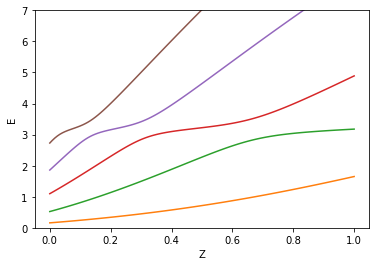

In [5]:
z_col=dfin.columns[1]
all_zs=dfin[z_col].values
zmin, zmax = all_zs[0], all_zs[-1]
if zmax < zmin:
    zmin, zmax = zmax, zmin
all_zs=(all_zs-zmin)/(zmax-zmin)

E_labels=dfin.columns[2:]
plt.cla()
plt.xlabel('Z')
plt.ylabel('E')
for E in E_labels:
    plt.plot(all_zs, dfin[E].values, '-')
plt.ylim(0,7)
plt.show()

Set the following parameters after inspecting the stabilization plot:
* lroot: the lower root; the 2nd root is lroot+1
* curvature_cutoff: the crossing is defined by the minimum and maximum curvature positions; the  selection range is determined by the drop off of the abs(curvature) 

Center of the crossing at z=0.30833333
N = 20 points on each curve


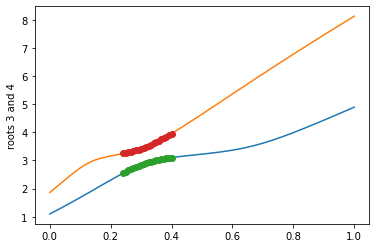

In [6]:
lroot = 3
curvature_cutoff=0.3

E_lw=dfin[E_labels[lroot]].values
E_up=dfin[E_labels[lroot+1]].values
success, cross_center, zs, E1s, E2s = st.crossing(all_zs, E_lw, E_up, curvature_cutoff)

if success:
    print(f'Center of the crossing at z={cross_center:.8f}')
    npts = len(zs)
    print(f'N = {npts} points on each curve')
    plt.cla()
    plt.plot(all_zs, E_lw, all_zs, E_up)
    plt.plot(zs, E1s, 'o', zs, E2s, 'o')
    plt.ylabel('roots '+str(lroot)+' and '+str(lroot+1))
    plt.show()
else:
    print('No crossing found.')
    zcs = (all_zs[zs[0]], all_zs[zs[1]])
    print('min/max curvature at z=%f and z=%f' % zcs)
    plt.cla()
    plt.plot(all_zs, E1s, all_zs, E2s)
    plt.ylabel('curvature '+str(lroot)+' and '+str(lroot+1))
    plt.show()

In [7]:
N=len(zs)
j_mid=np.argmin(abs(zs-cross_center))
min_data=8 # 

ils=[]
irs=[]
Ers=[]
Eis=[]
chi2s=[]

for ilft in range(j_mid-1):
    for irht in range(N,j_mid+1,-1):
        if irht - ilft > min_data:
            zsel, E1sel, E2sel = zs[ilft:irht], E1s[ilft:irht], E2s[ilft:irht]
            zreal, zimag, Er, Ei, chi2 = st.tbt_ana_lsq(zsel, E1sel, E2sel, cross_center)
            ils.append(ilft)
            irs.append(N-irht)
            Ers.append(Er)
            Eis.append(Ei)
            chi2s.append(chi2)
            print(f'{ilft:4d}  {N-irht:4d}   {Er:8f} {Ei:8f}   {chi2:.3e}')

   0     0   3.143024 -0.194062   3.160e-05
   0     1   3.143052 -0.195445   2.492e-05
   0     2   3.143147 -0.197047   1.933e-05
   0     3   3.143329 -0.198881   1.471e-05
   0     4   3.143620 -0.200963   1.095e-05
   0     5   3.144045 -0.203310   7.957e-06
   0     6   3.144637 -0.205943   5.630e-06
   0     7   3.145431 -0.208881   3.867e-06
   0     8   3.146472 -0.212147   2.572e-06
   0     9   3.147811 -0.215765   1.653e-06
   0    10   3.149510 -0.219757   1.025e-06
   1     0   3.144079 -0.191512   2.082e-05
   1     1   3.144030 -0.192702   1.593e-05
   1     2   3.144030 -0.194101   1.196e-05
   1     3   3.144096 -0.195723   8.775e-06
   1     4   3.144248 -0.197581   6.274e-06
   1     5   3.144507 -0.199691   4.354e-06
   1     6   3.144901 -0.202072   2.921e-06
   1     7   3.145461 -0.204744   1.887e-06
   1     8   3.146223 -0.207727   1.168e-06
   1     9   3.147233 -0.211043   6.910e-07
   1    10   3.148540 -0.214715   3.892e-07
   2     0   3.145098 -0.189292 

,left,right,Er,Ei,chi2
count,62.000000,62.000000,62.000000,62.000000,6.200000e+01
mean,2.596774,4.112903,3.145963,-0.195089,5.083050e-06
std,1.954060,2.852119,0.001528,0.008845,6.472940e-06
min,0.000000,0.000000,3.143024,-0.219757,2.054148e-07
25%,1.000000,2.000000,3.144914,-0.200077,8.340946e-07
50%,2.000000,4.000000,3.146000,-0.193269,2.479571e-06
75%,4.000000,6.000000,3.146981,-0.188234,6.576463e-06
max,6.000000,10.000000,3.149510,-0.183195,3.159536e-05


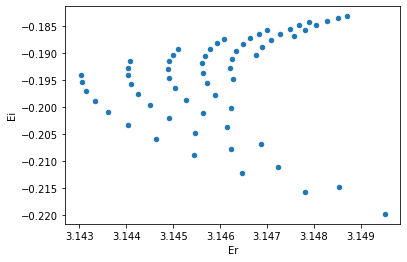

In [8]:
dic={'left':ils, 'right':irs, 'Er':Ers, 'Ei':Eis, 'chi2':chi2s}
df=pd.DataFrame(dic)
df.plot.scatter(x='Er', y='Ei')
df.describe()

In [9]:
xs=df.Er.values
ys=df.Ei.values

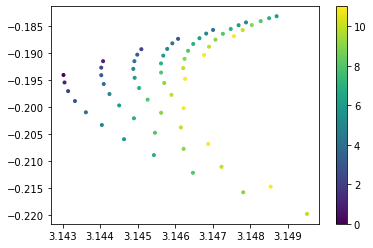

In [11]:
#
#  long vs short datasets
#
j_left=df.left.values*1.0
j_right=df.right.values*1.0
sum_pts=j_left + j_right
#sum_pts=left + right
plt.cla()
plt.scatter(xs, ys, marker='.', c=sum_pts, cmap='viridis')
plt.colorbar()
plt.show()

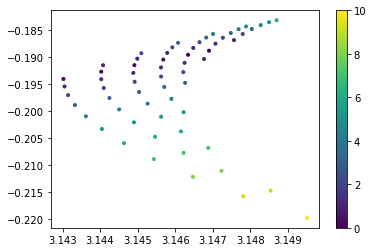

In [12]:
#
#  symmetric vs unsymmetric datasets
#
diff_pts=abs(j_left - j_right)
plt.cla()
plt.scatter(xs, ys, marker='.', c=diff_pts, cmap='viridis')
plt.colorbar()
plt.show()

In [15]:
# both

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)

fig.set_figwidth(6.4)
fig.set_figheight(3.2)

#axs[0].set_xticks([3.15, 3.18])

axs[0].scatter(xs, ys, marker='.', c=sum_pts, cmap='viridis')
axs[1].scatter(xs, ys, marker='.', c=diff_pts, cmap='viridis')
axs[0].plot(3.17296,-0.160848,'k+',markersize=10)
axs[1].plot(3.17296,-0.160848,'k+',markersize=10)
axs[0].set_xlabel("$E_r$ [eV]", fontsize=12)
axs[1].set_xlabel("$E_r$ [eV]", fontsize=12)
axs[0].set_ylabel("$E_i$ [eV]", fontsize=12)

plt.tight_layout()
plt.show()